In [1]:
import sys
sys.path.append("../..")

Calculated topo_row = 2


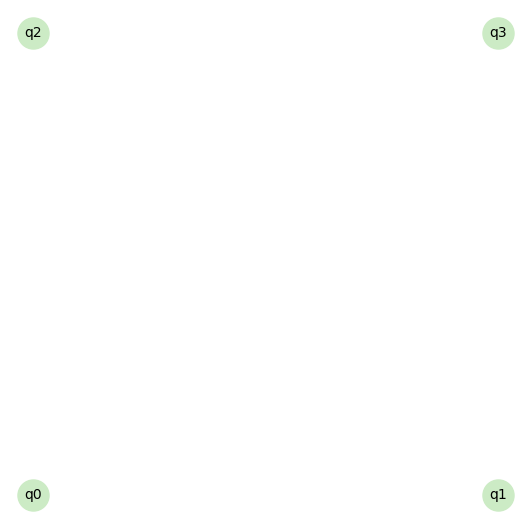

In [2]:
from api.design import Design
design = Design()
design.generate_topology(qubits_num=4, topo_col=2)
design.topology.show_image()

svg file saved at: ./svg/Gds.svg


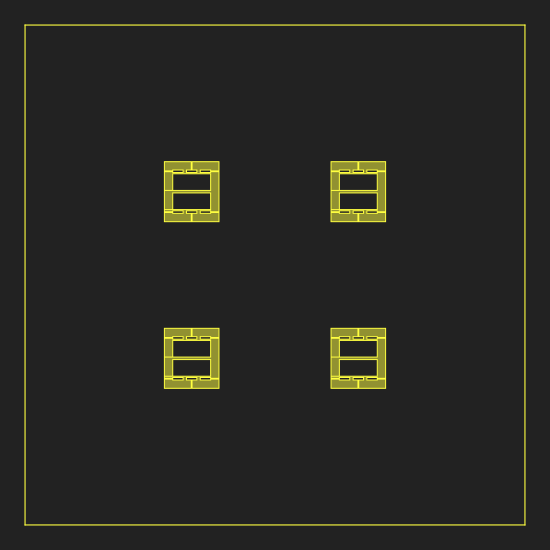

In [3]:
design.generate_qubits_from_topo(qubits_type="Transmon", chip_name="chip0")
design.generate_chip_from_qubits(chip_name="chip0")
design.gds.show_svg()

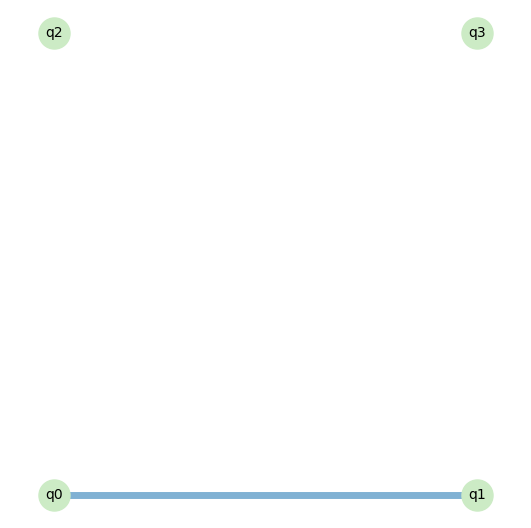

svg file saved at: ./svg/Gds.svg


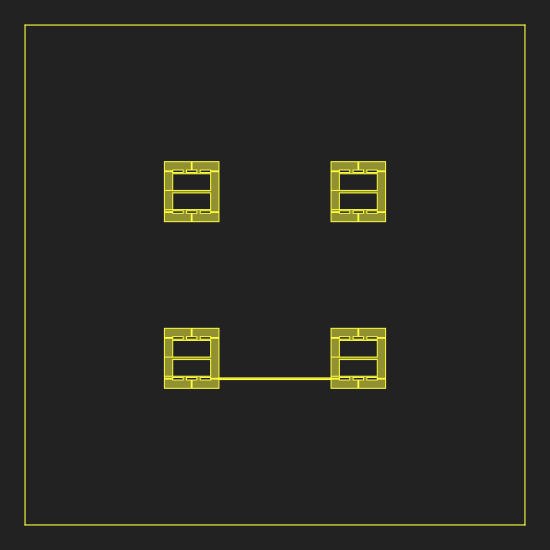

In [4]:
# design.calc_general_ops()
design.add_cpl(q0_name="q0", q0_pin_num=3, q1_name="q1", q1_pin_num=2)
design.topology.show_image()
design.gds.show_svg()

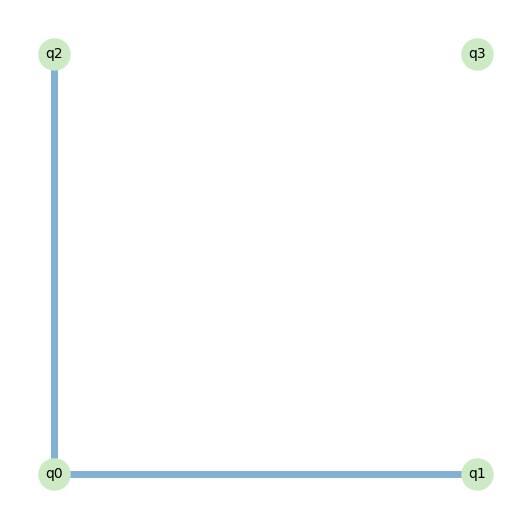

svg file saved at: ./svg/Gds.svg


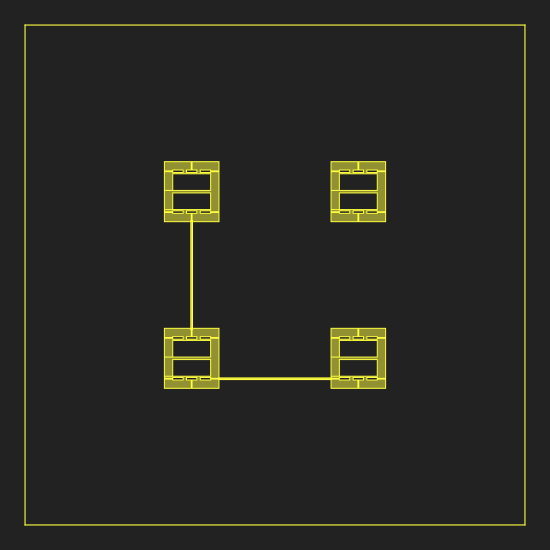

In [5]:
design.add_cpl(q0_name="q0", q0_pin_num=0, q1_name="q2", q1_pin_num=1)
design.topology.show_image()
design.gds.show_svg()

svg file saved at: ./svg/Gds.svg


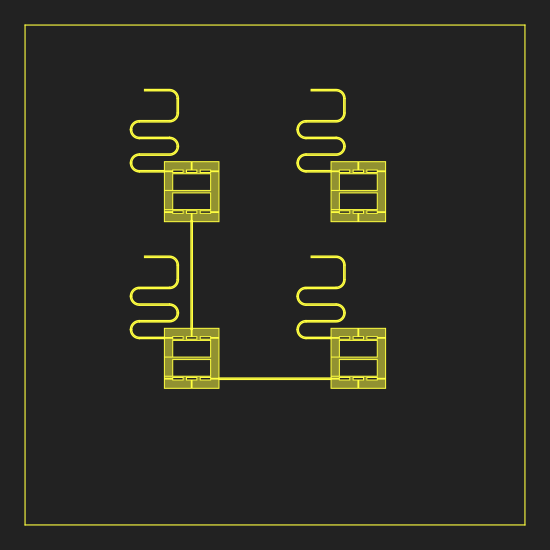

In [6]:
design.generate_readout_lines_from_qubits(rdls_type="ReadoutCavity")
design.gds.show_svg()

Control_off_chip strategy generating pins...
Generate transmission lines using the Control_off_chip strategy...
svg file saved at: ./svg/Gds.svg


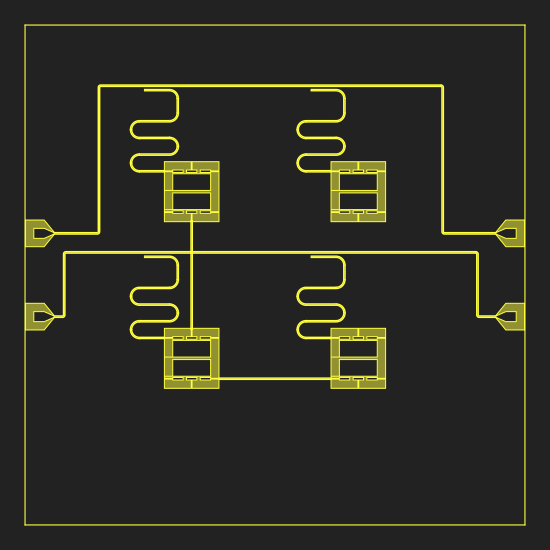

In [7]:
design.generate_readout_lines_from_qubits(rdls_type="ReadoutCavity", chip_name="chip0")
design.routing(method="Control_off_chip_routing", chip_name="chip0")
design.gds.show_svg()

In [8]:
design.gds.readout_lines.show_names()
design.gds.transmission_lines.show_names()
design.gds.pins.show_names()

['q0_readout', 'q1_readout', 'q2_readout', 'q3_readout']
['transmission_lines_horizontal_0', 'transmission_lines_horizontal_1']
['pin_left_0', 'pin_left_1', 'pin_right_0', 'pin_right_1']


In [13]:
design.simulation(sim_module="s21", 
                  mode="EigenMode", 
                  rdl_name="q1_readout", 
                  tml_name="transmission_lines_horizontal2", 
                  pin0_name="pin_left_2",
                  pin1_name="pin_right_2")

==========================================================s21
Simulating readout cavity and transmission line...
For λ/4, if l = 3000 um then fr = 10.660035817780523 GHz
mode = EigenMode
5 1 (9, 32) ((8, 49),) NewProject None ('Projecteda3',)
8 1 (24, 32) ((8, 1), (12, 17), (8, 49)) SetSolutionType None ('Eigenmode', False, 'Radiation')
57 1 (12, 0) () Paste None ()
9 1 (24, 32) ((8, 1), (3, 1), (8, 49), (12, 49)) SaveAs None ('C:/tianyan/simulation/rdls_tmls_simulation_eig.aedt', True, '', '')


In [12]:
design.simulation(sim_module="s21", 
                  mode="DrivenModel", 
                  rdl_name="q1_readout", 
                  tml_name="transmission_lines_horizontal_2",
                  pin0_name="pin_left_2",
                  pin1_name="pin_right_2")

==========================================================s21
Simulating readout cavity and transmission line...
For λ/4, if l = 3000 um then fr = 10.660035817780523 GHz
mode = DrivenModel
5 1 (9, 32) ((8, 49),) NewProject None ('Projecteda3',)
8 1 (24, 32) ((8, 1), (12, 17), (8, 49)) SetSolutionType None ('Eigenmode', False, 'Radiation')
57 1 (12, 0) () Paste None ()


com_error: (-2147352567, '发生意外。', (0, None, None, None, 0, -2147024381), None)